# Population and Sample

In [2]:
# Import libraries
import pandas as pd 
import numpy as np

## Population

In [4]:
# Create a Population Dataframe with 100 random numbers 

df = pd.DataFrame()
df['Population'] = np.random.randint(1, 1000, size=100)

df.head() 

,Population
0,184
1,439
2,473
3,667
4,430


## Sampling 

In [8]:
# Create sample with sampling size = 10 
# there are two types - replace = True / False 
# True means the value will be able to chose again vice versa 

sample_with_replacement = df['Population'].sample(10, replace=True)
sample_without_replacement = df['Population'].sample(10, replace=False)

print(sample_with_replacement)
print()
print(sample_without_replacement)

36    814
37    158
92    465
10    178
1     153
70    112
43    428
33    936
90    123
21    722
Name: Population, dtype: int32

54    923
41    558
96    112
14    665
68    768
99    993
28    570
86    224
84    920
36    814
Name: Population, dtype: int32


## Parameters and Statistics 

In [9]:
# Calculate the mean, variance, and standard deviation
mean_population = df['Population'].mean()
var_population = df['Population'].var(ddof=0)
std_population = df['Population'].std(ddof=0)

# Print the calculated values
print(f"Mean: {mean_population:.2f}")
print(f"Variance: {var_population:.2f}")
print(f"Standard Deviation: {std_population:.2f}")

Mean: 510.79
Variance: 97657.79
Standard Deviation: 312.50


In [10]:
# Randomly sample 50 population numbers without replacement
sample_50 = df['Population'].sample(50, replace=False)

# Calculate the sample mean, sample variance, and sample standard deviation
mean_sample = sample_50.mean()
var_sample = sample_50.var(ddof=1)
std_sample = sample_50.std(ddof=1)

# Print the calculated values
print(f"Sample Mean: {mean_sample:.2f}")
print(f"Sample Variance: {var_sample:.2f}")
print(f"Sample Standard Deviation: {std_sample:.2f}")

Sample Mean: 487.06
Sample Variance: 99290.34
Sample Standard Deviation: 315.10


## Demo why ddof = 1 for sampling 

In [11]:
# Demo why ddof = 1 for sampling 

sample_length = 1000
sample_variance_collection0 = [df['Population'].sample(50, replace=True).var(ddof=0) for i in range(sample_length)]
sample_variance_collection1 = [df['Population'].sample(50, replace=True).var(ddof=1) for i in range(sample_length)]

print(f"Population Variance: {var_population:.2f}")
print(f"Average of sample variance with n is: {pd.DataFrame(sample_variance_collection0)[0].mean():.2f}")
print(f"Average of sample variance with n-1 is: {pd.DataFrame(sample_variance_collection1)[0].mean():.2f}")

# Sample variance of ddof = 1 is closer to the population variance
# ddof=1 --> account for the loss of one degree of freedom due to the estimation of the sample mean, 
# resulting in a more accurate estimation of the population

Population Variance: 97657.79
Average of sample variance with n is: 96253.32
Average of sample variance with n-1 is: 98371.09


# Variation of Sample

In [12]:
# import libraries 
import pandas as pd 
import numpy as np 
from scipy.stats import norm 
import matplotlib.pyplot as plt
%matplotlib inline

## Sample mean and SD keep changing, but always within a certain range

In [35]:
# Generate a sample of size 50 from a normal distribution with mean 10 and standard deviation 5
Fstsample = pd.DataFrame(np.random.normal(10, 5, size=50))

# Calculate the sample mean and sample standard deviation
sample_mean = Fstsample[0].mean()
sample_std = Fstsample[0].std(ddof=1)

# Print the sample mean and sample standard deviation
print('Sample Mean:', sample_mean)
print('Sample Standard Deviation:', sample_std)

Sample Mean: 10.583994075050677
Sample Standard Deviation: 5.686576391912332


## Empirical Distribution of mean

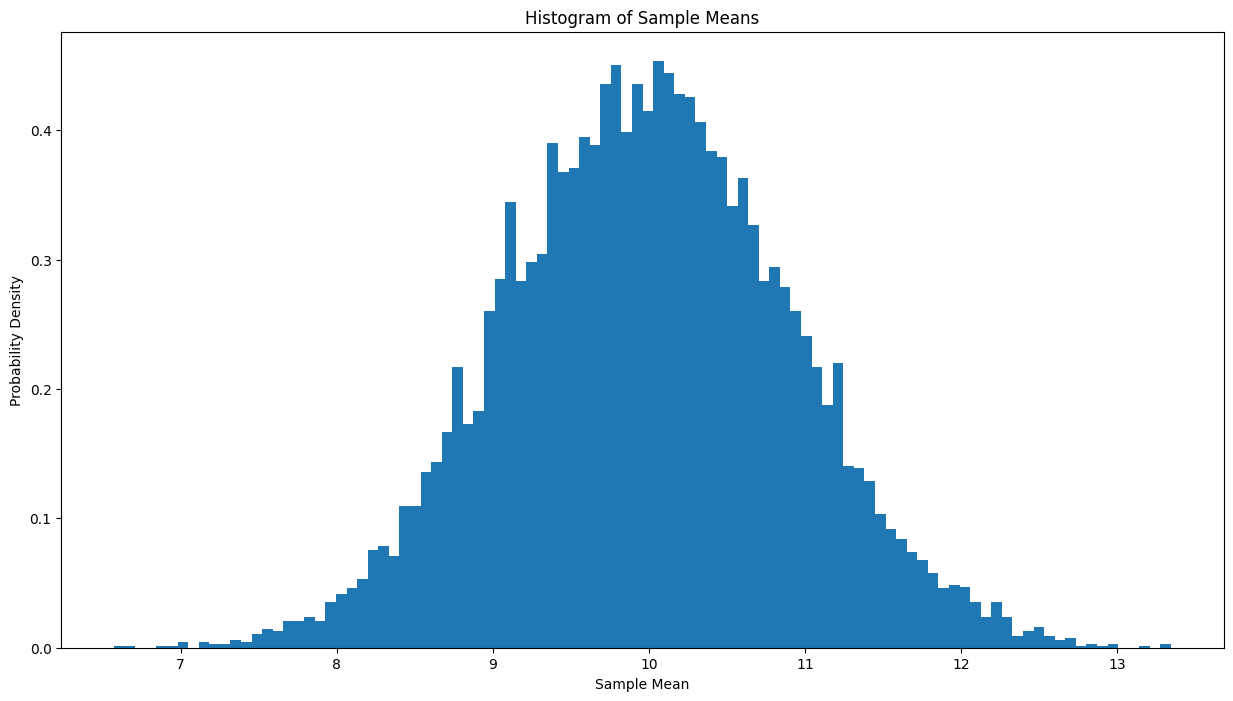

In [16]:
# Create an empty list to store the sample means
meanlist = []

# Generate 10000 samples, each of size 30, from a normal distribution with mean 10 and standard deviation 5
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    # Calculate the mean of each sample and append it to the meanlist
    meanlist.append(sample[0].mean())

# Create a DataFrame to store the collection of sample means
collection = pd.DataFrame()
collection['meanlist'] = meanlist

# Plot a histogram of the sample means using Matplotlib
plt.figure(figsize=(15, 8))
# Use plt.hist() to create the histogram with 100 bins and normalize it to represent a probability density distribution
plt.hist(collection['meanlist'], bins=100, density=True)
plt.xlabel('Sample Mean')  # Set the x-axis label
plt.ylabel('Probability Density')  # Set the y-axis label
plt.title('Histogram of Sample Means')  # Set the title of the plot
plt.show()  # Display the plot

## Sampling from arbritary distribution

<Figure size 1500x800 with 0 Axes>

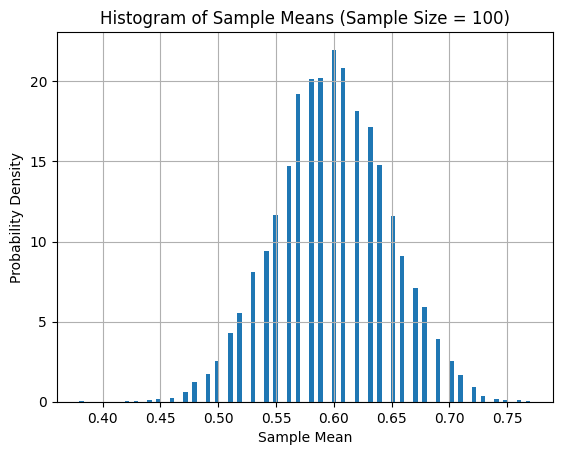

In [18]:
# See what central limit theorem tells you...the sample size is larger enough, 
# the distribution of sample mean is approximately normal
# apop is not normal, but try to change the sample size from 100 to a larger number. The distribution of sample mean of apop 
# becomes normal.

# Set the sample size for the experiment
sample_size = 100

# Create an empty list to store the sample means
samplemeanlist = []

# Define the population data (apop) - this population is not normal
apop = pd.DataFrame([1, 0, 1, 0, 1])

# Run the experiment 10,000 times
for t in range(10000):
    # Sample from the population apop with the given sample size (small sample size)
    sample = apop[0].sample(sample_size, replace=True)
    
    # Calculate the sample mean and append it to the samplemeanlist
    samplemeanlist.append(sample.mean())

# Create a DataFrame to store the collection of sample means
acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist

# Plot a histogram of the sample means using Matplotlib
plt.figure(figsize=(15, 8))
# Use plt.hist() to create the histogram with 100 bins and normalize it to represent a probability density distribution
acollec.hist(bins=100, density=True)
plt.xlabel('Sample Mean')  # Set the x-axis label
plt.ylabel('Probability Density')  # Set the y-axis label
plt.title('Histogram of Sample Means (Sample Size = 100)')  # Set the title of the plot
plt.show()  # Display the plot


# Confidence Interval 

**Estimate the average stock return with 90% confidence interval**

In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [23]:
MSFT = pd.read_csv('data/microsoft.csv')

# Calculate the log return
MSFT['logReturn'] = np.log(MSFT['Close'].shift(-1)) - np.log(MSFT['Close'])
MSFT.head()

,Date,Open,High,Low,Close,Adj Close,Volume,logReturn
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994


In [80]:
sample_size = MSFT['logReturn'].shape[0]  
sample_mean = MSFT['logReturn'].mean()    
sample_std = MSFT['logReturn'].std(ddof=1)

# Print the results
print("Sample Size:", sample_size)
print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)

Sample Size: 780
Sample Mean: 0.0008202314861230223
Sample Standard Deviation: 0.01419189738873751


In [82]:
# Confidence level and significance level
confidence_level = 0.90
significance_level = 1 - confidence_level

# Calculate the critical values (quantiles)
# left and right quantile
z_left = norm.ppf(significance_level / 2)   
z_right = norm.ppf(1 - significance_level / 2) 

print(z_left, z_right)

-1.6448536269514729 1.6448536269514722


In [69]:
# Calculate the confidence interval bounds
interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std

In [70]:
# 90% confidence interval tells you that there will be 
# 90% chance that the average stock return lies between 
# "interval_left" and "interval_right".

print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (-0.02252336240706501, 0.02416382537931104)


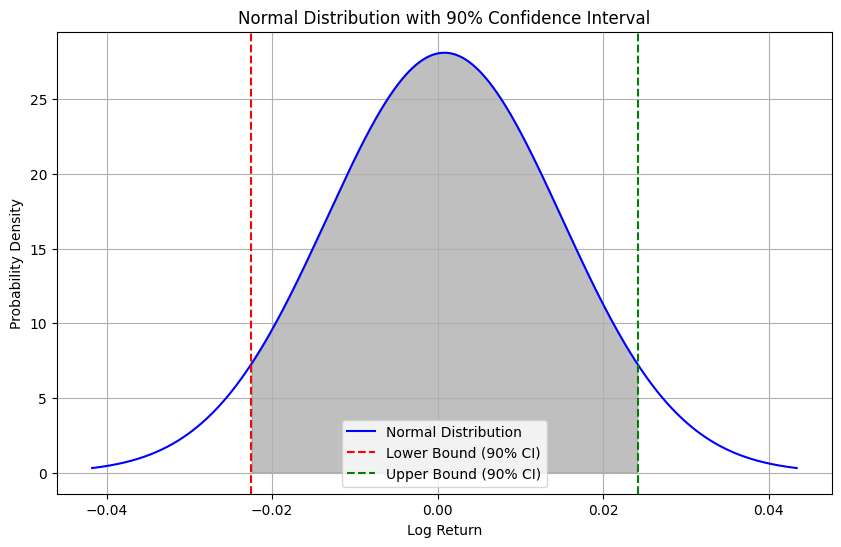

In [71]:
# Plot the normal distribution
x = np.linspace(sample_mean - 3 * sample_std, sample_mean + 3 * sample_std, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x, sample_mean, sample_std), 'b-', label='Normal Distribution')
plt.fill_between(x, 0, norm.pdf(x, sample_mean, sample_std), where=(x >= interval_left) & (x <= interval_right), color='gray', alpha=0.5)
plt.axvline(interval_left, color='r', linestyle='--', label='Lower Bound (90% CI)')
plt.axvline(interval_right, color='g', linestyle='--', label='Upper Bound (90% CI)')
plt.title('Normal Distribution with 90% Confidence Interval')
plt.xlabel('Log Return')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


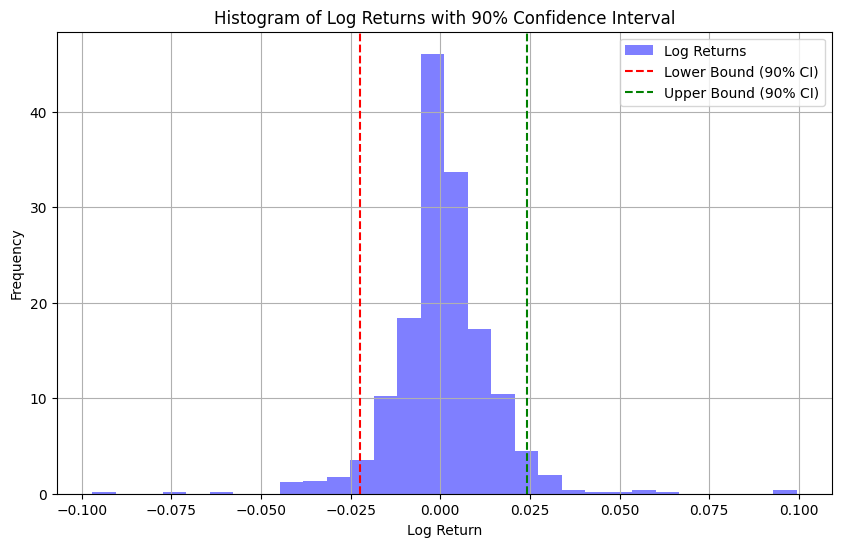

In [72]:
# Visualize the data with a histogram
plt.figure(figsize=(10, 6))
plt.hist(MSFT['logReturn'], bins=30, density=True, alpha=0.5, color='b', label='Log Returns')
plt.axvline(interval_left, color='r', linestyle='--', label='Lower Bound (90% CI)')
plt.axvline(interval_right, color='g', linestyle='--', label='Upper Bound (90% CI)')
plt.title('Histogram of Log Returns with 90% Confidence Interval')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


# Hypothesis Testing

Hypothesis testing is a statistical method used to make inferences about population parameters based on sample data. It helps you determine whether observed differences or effects in your data are statistically significant or just due to random variation. Hypothesis testing involves setting up and evaluating two competing hypotheses: the null hypothesis H<sub>0</sub> and the alternative hypothesis H<sub>1</sub> or H<sub>a</sub>

## Two-tailed test

A two-tailed test is used to determine if there is a statistically significant difference between a sample statistic and a population parameter in either direction. In other words, it checks if the observed effect is significantly different from what would be expected by chance in both the positive and negative directions.



In [73]:
import pandas as pd
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline 

In [74]:
MSFT = pd.read_csv('data/microsoft.csv').set_index('Date')

# Calculate the log return
MSFT['logReturn'] = np.log(MSFT['Close'].shift(-1)) - np.log(MSFT['Close'])
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume,logReturn
Date,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994


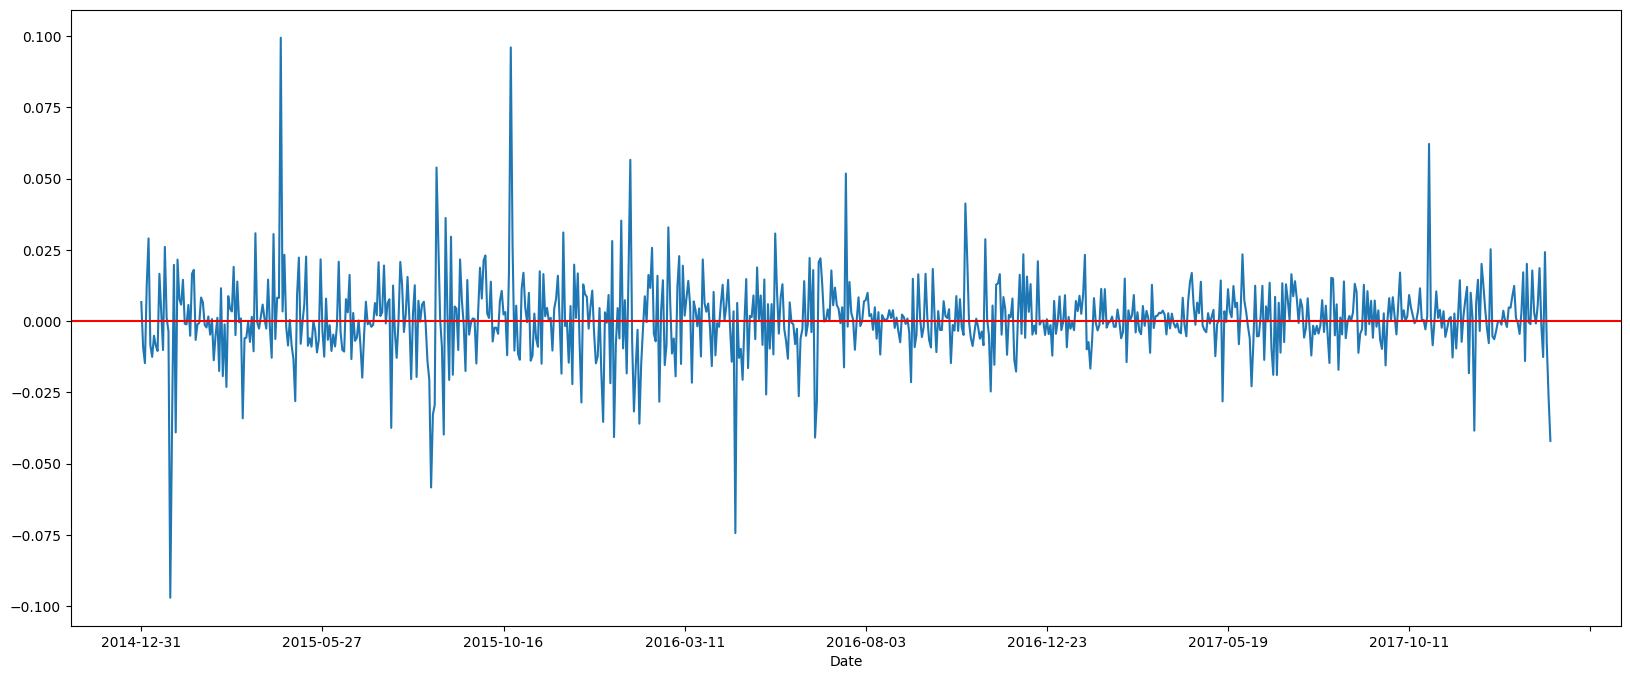

In [75]:
# Log return goes up and down during the period
MSFT['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

**Step 1: Set hypothesis**

Null Hypothesis H<sub>0</sub> : Average stock return is 0

Alternative Hypothesis H<sub>1</sub> : Average stock return is not equal to 0

**Step 2: Calculate test statistic**

In [98]:
sample_size = MSFT['logReturn'].shape[0]  
sample_mean = MSFT['logReturn'].mean()    
sample_std = MSFT['logReturn'].std(ddof=1)

# Print the results
print("Sample Size:", sample_size)
print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)

Sample Size: 780
Sample Mean: 0.0008202314861230223
Sample Standard Deviation: 0.01419189738873751


In [99]:
# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis

# Calculate the Z-statistic (Z-hat)
mu = 0
zhat = (sample_mean - mu)/(sample_std/sample_size**0.5)
print(zhat)

1.614147714000367


**Step3: Set decision criteria**

In [100]:
# confidence_level = 0.95
significance_level = 0.05

zleft = norm.ppf(significance_level / 2)
zright = -zleft  # z-distribution is symmetric 
print("Critical Values (Left and Right):", zleft, zright)

Critical Values (Left and Right): -1.9599639845400545 1.9599639845400545


In [101]:
# Calculate the p-value
p_value = 2 * norm.cdf(-np.abs(zhat))  # Multiply by 2 for two-tailed test
print("P-Value:", p_value)

P-Value: 0.10649538999393701


In [103]:
# Determine whether to reject the null hypothesis
# reject_null = zleft < significance_level or significance_level > zright

# Alternative using p-value 
reject_null = p_value < significance_level


# Print the conclusion of the hypothesis test
if reject_null:
    print("Reject the null hypothesis: Average stock return is not equal to 0.")
else:
    print("Fail to reject the null hypothesis: Average stock return is 0.")

Reject the null hypothesis: Average stock return is not equal to 0.


## One-tailed test

A one-tailed test, also known as a one-sided test, is used to determine if there is a statistically significant difference or effect in one specific direction (either greater than or less than a specified value).



**Step 1: Set hypothesis**

Null Hypothesis H<sub>0</sub> : The average log return for MSFT is less than or equal to 0

Alternative Hypothesis H<sub>1</sub> : The average log return for Microsoft stock is greater than 0.

In [104]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [105]:
MSFT = pd.read_csv('data/microsoft.csv').set_index('Date')

# Calculate the log return
MSFT['logReturn'] = np.log(MSFT['Close'].shift(-1)) - np.log(MSFT['Close'])
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume,logReturn
Date,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994


**Step 2: Calculate test statistic**


In [106]:
sample_size = MSFT['logReturn'].shape[0]
sample_mean = MSFT['logReturn'].mean()
sample_std = MSFT['logReturn'].std(ddof=1)

# Print the sample statistics
print("Sample Size:", sample_size)
print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)

# Calculate the Z-statistic (Z-hat)
zhat = (sample_mean - 0) / (sample_std / np.sqrt(sample_size))
print("Z-statistic (Z-hat):", zhat)

Sample Size: 780
Sample Mean: 0.0008202314861230223
Sample Standard Deviation: 0.01419189738873751
Z-statistic (Z-hat): 1.614147714000367


**Step 3: Set decision criteria***

In [107]:
significance_level = 0.05

# Calculate the critical value for a one-tailed test (right tail)
zright = norm.ppf(1 - significance_level)
print("Critical Value (Right Tail):", zright)

Critical Value (Right Tail): 1.6448536269514722


In [108]:
# Calculate the p-value for the right tail
p_value = 1 - norm.cdf(zhat)

print("P-Value (Right Tail):", p_value)

P-Value (Right Tail): 0.053247694996968464


In [109]:
# Determine whether to reject the null hypothesis
reject_null = p_value < significance_level

# Print the conclusion of the hypothesis test
if reject_null:
    print("Reject the null hypothesis: Average log return is greater than 0.")
else:
    print("Fail to reject the null hypothesis: Average log return is less than or equal to 0.")

Fail to reject the null hypothesis: Average log return is less than or equal to 0.
